In [16]:
import pickle
from sklearn.metrics import accuracy_score, classification_report
from yellowbrick.classifier import ConfusionMatrix
import numpy as np
from sklearn.linear_model import LogisticRegression

In [14]:
with open( './assets/risco_credito.pkl', 'rb') as f:
    X_risco_credito, Y_risco_credito = pickle.load(f)

In [15]:
#Registros moderados apagados para que o exemplo seja igual a aula teórica
X_risco_credito = np.delete(X_risco_credito, [2, 7, 11], axis = 0)
Y_risco_credito = np.delete(Y_risco_credito, [2, 7, 11], axis = 0)

In [18]:
logistic_risco_credito = LogisticRegression(random_state = 0)
logistic_risco_credito.fit(X_risco_credito, Y_risco_credito)

LogisticRegression(random_state=0)

In [19]:
logistic_risco_credito.intercept_

array([-0.80828993])

In [20]:
logistic_risco_credito.coef_

array([[-0.76704533,  0.23906678, -0.47976059,  1.12186218]])

In [22]:
#historia boa (0), divida alta (0), garantias nenhuma (1), renda > 35 (2)]
#historia ruim (2), divida alta (0), garantia adequada (0), renda < 15 (0)
previsoes_risco_credito = logistic_risco_credito.predict([[0,0,1,2], [2,0,0,0]])
previsoes_risco_credito

array(['baixo', 'alto'], dtype=object)

    Base Credito

In [23]:
with open( './assets/credit.pkl', 'rb') as f:
    X_credit_treinamento, Y_credit_treinamento,    X_credit_teste, Y_credit_teste = pickle.load(f)

In [26]:
logistic_credit = LogisticRegression(random_state=0)
logistic_credit.fit(X_credit_treinamento, Y_credit_treinamento)

LogisticRegression(random_state=0)

In [27]:
logistic_credit.intercept_

array([-6.02975455])

In [28]:
logistic_credit.coef_

array([[-2.5492665 , -3.72279323,  3.93940035]])

In [29]:
previsoes_credit = logistic_credit.predict(X_credit_teste)

In [30]:
accuracy_score(Y_credit_teste, previsoes_credit)

0.946

0.946

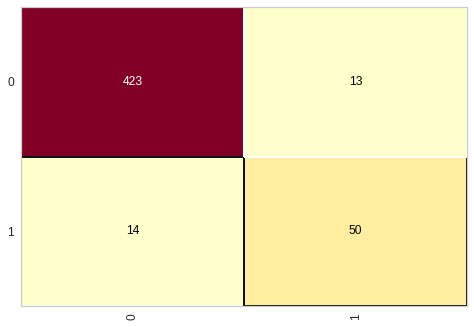

In [31]:
cm = ConfusionMatrix(logistic_credit)
cm.fit(X_credit_treinamento, Y_credit_treinamento)
cm.score(X_credit_teste, Y_credit_teste)

In [32]:
print(classification_report(Y_credit_teste, previsoes_credit))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       436
           1       0.79      0.78      0.79        64

    accuracy                           0.95       500
   macro avg       0.88      0.88      0.88       500
weighted avg       0.95      0.95      0.95       500



    Base census

In [33]:
with open( './assets/census.pkl', 'rb') as f:
    X_census_treinamento, Y_census_treinamento, X_census_teste, Y_census_teste = pickle.load(f)

In [34]:
logistic_census = LogisticRegression(random_state=0)
logistic_census.fit(X_census_treinamento, Y_census_treinamento)

LogisticRegression(random_state=0)

In [35]:
previsoes_census = logistic_census.predict(X_census_teste)

In [36]:
accuracy_score(Y_census_teste, previsoes_census)

0.849539406345957

0.849539406345957

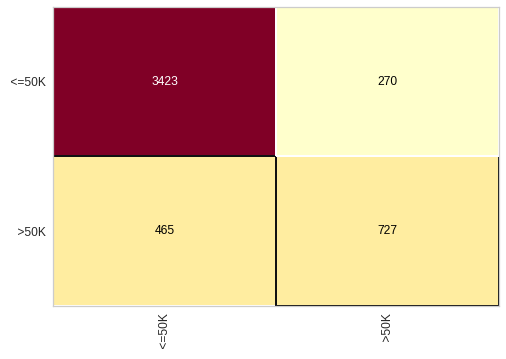

In [38]:
cm = ConfusionMatrix(logistic_census)
cm.fit(X_census_treinamento, Y_census_treinamento)
cm.score(X_census_teste, Y_census_teste)

In [39]:
print(classification_report(Y_census_teste, previsoes_census))

              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      3693
        >50K       0.73      0.61      0.66      1192

    accuracy                           0.85      4885
   macro avg       0.80      0.77      0.78      4885
weighted avg       0.84      0.85      0.84      4885

